In [1]:
import os
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc
import pandas as pd

In [2]:
path = os.getcwd() + "/new_fft_npa11/"
path

'C:\\Users\\traan\\AIL Beesound Code\\15_8_23/new_fft_npa11/'

In [3]:
TRAINING_DIR = path+"/train"
VALIDATION_DIR = path + "/val"
TEST_DIR = path + "/test"

In [4]:
def data_loader(path):
    X = []
    y = []
    for folder in os.listdir(path):
        for file in os.listdir(os.path.join(path, folder)):
            feature = np.load(os.path.join(path, folder, file))
            label = folder
            X += feature.tolist()
            y += [label]*feature.shape[0]
    return X, y

In [5]:
X_train, y_train = data_loader(TRAINING_DIR)
X_val, y_val = data_loader(VALIDATION_DIR)
X_test, y_test = data_loader(TEST_DIR)

In [6]:
X_train = np.array(X_train)
X_train = X_train.reshape(X_train.shape[0], -1)

X_val = np.array(X_val)
X_val = X_val.reshape(X_val.shape[0], -1)

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], -1)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_val: {}".format(X_val.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_val: {}".format(y_val.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (14000, 128)
Shape of X_val: (2000, 128)
Shape of X_test: (4000, 128)
Shape of y_train: (14000,)
Shape of y_val: (2000,)
Shape of y_test: (4000,)


In [7]:
X_test = np.vstack((X_test, X_val))
y_test = np.hstack((y_test, y_val))
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (14000, 128)
Shape of X_test: (6000, 128)
Shape of y_train: (14000, 1)
Shape of y_test: (6000, 1)


In [8]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [9]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
np.unique(y_test)

C:\Users\traan\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\traan\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0, 1])

In [10]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)
print(X_train.shape)

(14000, 128)


In [11]:
model = ExtraTreesClassifier(random_state = 1337)

In [12]:
np.random.seed(1337)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

In [13]:
training_time = end_time - start_time
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

In [14]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report)
print("Training time: {:.2f} seconds".format(training_time))

Accuracy: 0.9145
Confusion Matrix:
[[2791  209]
 [ 304 2696]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      3000
           1       0.93      0.90      0.91      3000

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000

Training time: 3.21 seconds


In [16]:
def plot_confusion_matrix(cm, title='FFT 1D with Extra Trees Confusion Matrix'):
    df_cm = pd.DataFrame(cm, index = [i for i in ['Queen', 'Queenless']],
                    columns = [i for i in ['Queen', 'Queenless']])
    df_cm_normed = df_cm/df_cm.sum()
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, fmt="", )
    plt.title(title)
    plt.savefig("FFT 1D with Extra Trees Confusion Matrix.png")
    plt.show()

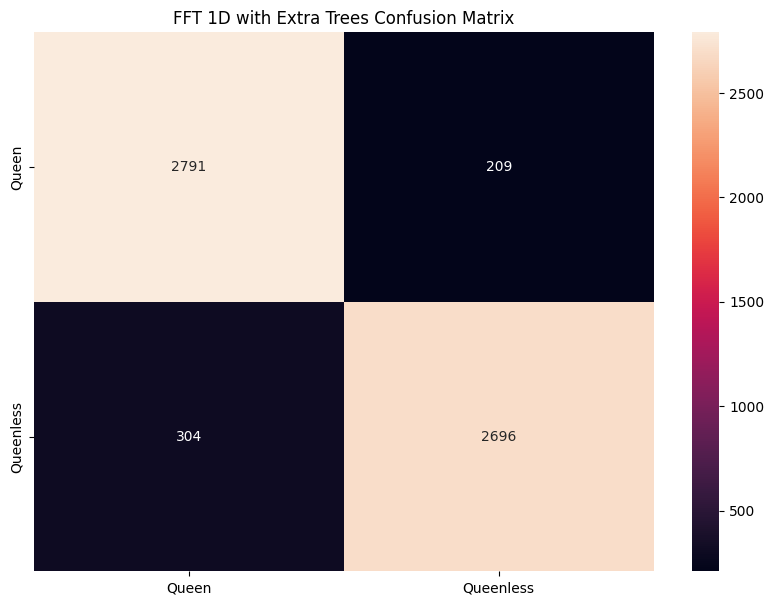

In [17]:
plot_confusion_matrix(cm)

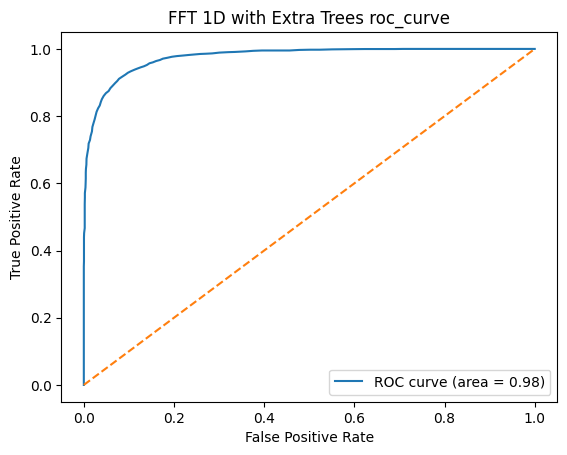

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="ROC curve (area = {0:.2f})".format(auc))
plt.plot([0, 1], [0, 1], linestyle="dashed")
plt.title("FFT 1D with Extra Trees roc_curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig("FFT 1D with Extra Trees roc_curve.png")
plt.show()

In [20]:
with open("fft_1D_ExtraTreemodel.pkl", "wb") as f:
    pickle.dump(model, f)